In [6]:
import torch
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path="../"
sys.path.append(path)
import Preprocessing as hsa_preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg

from PIL import Image
from loguru import logger
import Model as hsa_model

Read Images and plot shape of np.array associated with it. 

In [2]:
image_path= "./night_sky2.jpeg"
img = Image.open(image_path)
array = np.array(img)
print(f"array shape: {array.shape}")

array shape: (1280, 1280, 3)


Plot images of the RGB spectra and original data as np before conversion to df. 

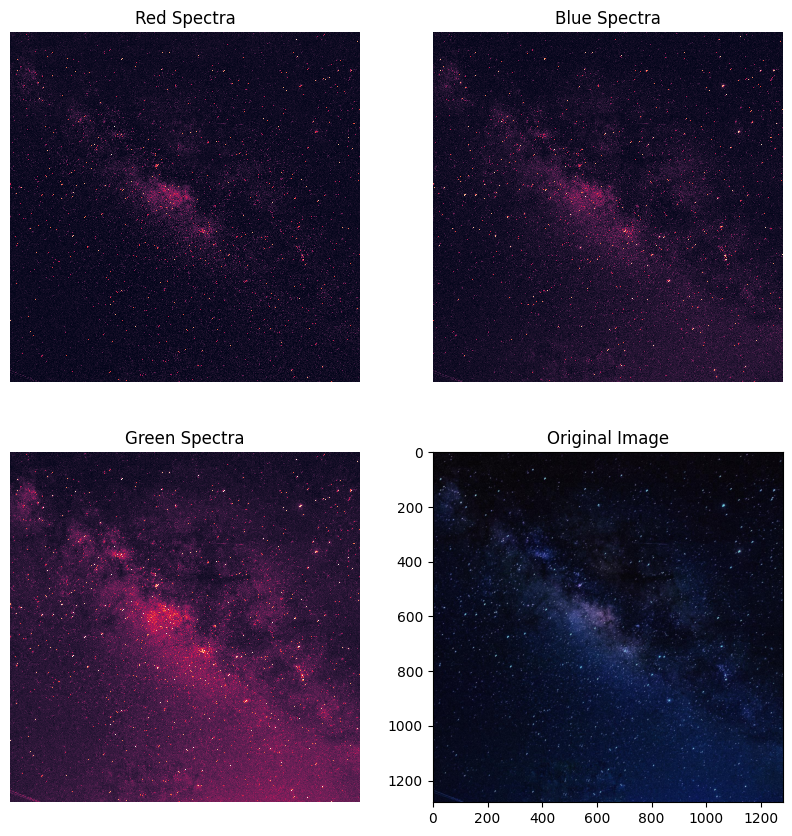

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
titles= ["Red Spectra", "Blue Spectra","Green Spectra", "Original Image"]
for i, ax in enumerate(axs.flat):
    try:
        sns.heatmap(array[:,:,i], square=True, xticklabels=False, yticklabels=False, cbar=False, ax=ax)
        ax.set_title(titles[i])
    except:
        ax.set_title(titles[i])
        image = mpimg.imread(image_path)
        ax.imshow(image)

Generate a list of data points from image and convert to df to begin vanilla preprocessing.

In [ ]:
data = None
columns = ["red", "green", "blue"]

for row in range(len(array)):
    try:
        data = np.append(data, array[row, : , :], axis=0)
    except:
        data = array[row, : , :]
 
scaler = StandardScaler()
scaler.fit(data)
preprocessed_df = pd.DataFrame(scaler.transform(data), columns=columns)

In [ ]:
model = hsa_model.HSI_model(
            penalty_ratio=.8,
            cutoff_dist= 2.1,
            converge_toll= 1e-5,
            anomaly_std_toll= 2.5,
            affinity_matrix_iterations= 20,
            lr= 2.7,
            logger=None,
            multifilter_flag=0,
        )